In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/usr/local/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
def pdf_fig(figure, filename):
    figure = figure.get_figure()
    figure.savefig("../../thesis/img/dev-mails/" + filename + ".pdf", bbox_inches = "tight")

In [3]:
# seaborn styling
sns.set_style("darkgrid")
sns.set_palette(sns.husl_palette(h=.5, s=1))
sns.set_context("talk")

def label_bars_ints(ax):
    for p in ax.patches:
        ax.annotate("%.0i" % np.nan_to_num(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=14, color='black', xytext=(0, 10),
            textcoords='offset points')

def label_bars_floats(ax):
    for p in ax.patches:
        if p.get_width() == 0:
            continue
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=14, color='black', xytext=(0, 10),
            textcoords='offset points')
        ax.hlines(p.get_height(), p.get_x(), p.get_x() + p.get_width())

def process_fig(ax, name, int_annotation, hue_title):
    if (int_annotation):
        label_bars_ints(ax)
    else:
        label_bars_floats(ax)
    if (hue_title != ''):
        ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), title=hue_title)
    pdf_fig(ax, name)
    plt.show()
    ax.clear()

In [4]:
dm_dup = pd.read_csv('dev-mails-data.csv')

In [5]:
s = dm_dup.groupby('build_id').size()
duplicates = s[s > 1].to_frame()
#duplicates.index.tolist()
dm_dup[dm_dup['build_id'].isin(duplicates.index.tolist())]

,valid - override,extraction valid,URL Variable: extractioncorrect,output,build_num,repository_owner,repository_name,build_id,Was our extraction from the buildlog correct?,"Would you go to the whole build log, scroll to the part describing the actual reason the build failed and copy-paste that part back here? Alternatively you could also describe the actual failure reason with your own words.","If you want, please tell us why our extraction was wrong / this one is correct",Unnamed: 11
4,NaN,ja,True,005+ Error: stat1 do not match with stat2 at k...,37627.0,php,php-src,529942305.0,NaN,NaN,NaN,NaN
8,NaN,ja,True,005+ Error: stat1 do not match with stat2 at k...,37627.0,php,php-src,529942305.0,NaN,NaN,NaN,NaN
14,NaN,ja,True,normalize.css[24m [2m47:6[22m [31m[31m✖[31...,354.0,necolas,normalize.css,443134971.0,NaN,NaN,NaN,NaN
22,ja,nein,False,normalize.css[24m [2m47:6[22m [31m[31m✖[31...,354.0,necolas,normalize.css,443134971.0,"close, but not quite correct",47:6 ✖ Expected indentation of indentatio...,The presumed reason only included the first 5 ...,NaN
46,NaN,ja,True,confirms_rejects_SUITE:mixed_dead_alive_queues...,3761.0,rabbitmq,rabbitmq-server,571824621.0,NaN,NaN,NaN,NaN
47,NaN,ja,True,confirms_rejects_SUITE:mixed_dead_alive_queues...,3761.0,rabbitmq,rabbitmq-server,571824621.0,NaN,NaN,NaN,NaN
48,NaN,ja,True,confirms_rejects_SUITE:mixed_dead_alive_queues...,3761.0,rabbitmq,rabbitmq-server,571824621.0,NaN,NaN,NaN,NaN
53,NaN,ja,True,1) ComposerTestRepositoryComposerRepositoryTes...,8421.0,composer,composer,551282890.0,NaN,NaN,NaN,NaN
77,NaN,ja,True,1) ComposerTestRepositoryComposerRepositoryTes...,8421.0,composer,composer,551282890.0,NaN,NaN,NaN,NaN
95,NaN,ja,True,[0K$ ./check_integrity.sh $(find bin | cut -b ...,310.0,tj,git-extras,562612733.0,NaN,NaN,NaN,NaN


In [6]:
# drop duplicate answers
dm = dm_dup.drop([4, 14, 46, 47, 53, 95, 102, 109])

In [7]:
dm['extraction_correct'] = (dm['extraction valid'] == 'ja') | (dm['valid - override'] == 'ja')

In [8]:
dm.loc[dm['extraction_correct'], 'Answer'] = 'Labeled incorrectly'
dm.loc[~(dm['extraction_correct'] & dm['extraction valid']), 'Answer'] = 'Correct after manual\nanswer inspection'
dm.loc[dm['extraction valid'] == 'ja', 'Answer'] = 'Labeled correctly'

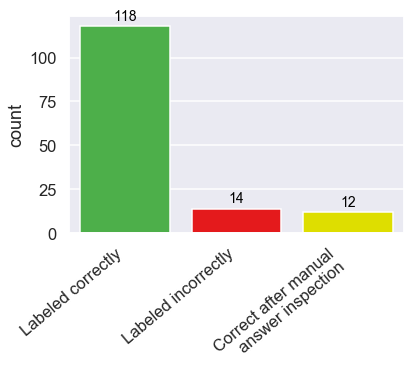

In [9]:
ax = sns.countplot(x='Answer', data=dm,
                   palette=['#4daf4a', '#e41a1c', '#dede00'], saturation=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('')
process_fig(ax, 'extraction-correct', True, '')

In [10]:
builds2 = pd.read_csv('../../data-collection/dev-mail/builds2.csv')
mail_grouped = builds2.groupby('email').size()
# mail_grouped.agg('mean')
mail_grouped.count()

246

In [11]:
builds2.count()[0]

797

In [12]:
builds2

,log_index,language,repo_slug,build_id,job_id,repository_owner,repository_name,build_number,email,dev_name,commit_sha,commit_date,output,jobs_url_job_id
0,0,C,git@git,564416725,564416727,git,git,4409,gitster@pobox.com,Junio C Hamano,4f099647e281d4dd69c84f3560f02c693e755bea,2019-07-27T16:11:16Z,+t/trace_schema_validator/trace_schema_validat...,jobs/564416727
1,1,C,git@git,564815538,564815540,git,git,4410,gitster@pobox.com,Junio C Hamano,201a12afbe3b0c834f6ffc2fe24d5bcf051c9df6,2019-07-29T04:53:45Z,+t/trace_schema_validator/trace_schema_validat...,jobs/564815540
2,2,C,git@git,565119978,565119980,git,git,4412,gitster@pobox.com,Junio C Hamano,5efadd506424c9419847e753a5e005841fb85dec,2019-07-29T16:47:01Z,t/trace_schema_validator/trace_schema_validato...,jobs/565119980
3,3,C,git@git,565692415,565692417,git,git,4418,gitster@pobox.com,Junio C Hamano,58ddabced2da0a1a4b63dab74cf0d317a44f81ee,2019-07-30T21:33:24Z,+t/trace_schema_validator/trace_schema_validat...,jobs/565692417
4,4,C,git@git,565709337,565709339,git,git,4419,gitster@pobox.com,Junio C Hamano,393a9dd0f9762c69f753a8fa0bc89c203c6b4e9e,2019-07-30T22:05:41Z,+t/trace_schema_validator/trace_schema_validat...,jobs/565709339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,5,VimL,neovim@neovim,567682531,567682532,neovim,neovim,34132,eng-Abdelhakeem.Osama1621@alexu.edu.eg,Abdelhakeem Osama,e01031949950bb2a03509e41cb605260a3eab9c2,2019-08-05T01:38:51Z,ERROR: AddressSanitizer: SEGV on unknown addre...,jobs/567682532
793,6,VimL,neovim@neovim,567686448,567686449,neovim,neovim,34134,justinkz@gmail.com,Justin M. Keyes,dda4338b8dd9e097c140cd37dd6354e8827c1e52,2019-08-05T02:02:41Z,ERROR: AddressSanitizer: SEGV on unknown addre...,jobs/567686449
794,7,VimL,neovim@neovim,567689244,567689245,neovim,neovim,34135,justinkz@gmail.com,Justin M. Keyes,b77c42c93a06c32d775f5a4bb63d953a99bf03f4,2019-08-05T02:19:36Z,ERROR: AddressSanitizer: SEGV on unknown addre...,jobs/567689245
795,8,VimL,neovim@neovim,567689318,567689319,neovim,neovim,34136,h-michael@freee.co.jp,Hirokazu Hata,2a9399cc875568a3d3457667c5bed3d7d2028fcd,2019-08-05T02:19:56Z,"ERROR ][0m[0m [1m9[0m errors, listed below:\...",jobs/567689319


In [13]:
merge = pd.merge(builds2, dm, on='build_id')
recieved_grouped = merge.groupby('email').size()
recieved_grouped.count()

61

In [14]:
mails_not_sent = ['antonio@antarg.co',
                  '116161+DustinCampbell@users.noreply.github.com',
                  '620768+soulmachine@users.noreply.github.com',
                  '27620401+kchibisov@users.noreply.github.com',
                  '1866779+chbatey@users.noreply.github.com',
                  '8305679+Neilpang@users.noreply.github.com',
                  'szeiger@users.noreply.github.com',
                  '5862206+rishabhnambiar@users.noreply.github.com',
                  '8740057+janlazo@users.noreply.github.com',
                  'MichaelGuoXY@users.noreply.github.com',
                  'nlilienthal@forwardfinancing.com',
                  'zx@twitter.com',
                  '41298167+mathcantin@users.noreply.github.com',
                  '43857735+shoaibsultan@users.noreply.github.com',
                  'chaconnewu@users.noreply.github.com',
                  '7692501+renehernandez@users.noreply.github.com',
                  '37937464+loveleshsharma@users.noreply.github.com',
                  'joel.nothman@unimelb.edu.au',
                  'jeremy.derusse@sensiolabs.com',
                  '5313213+RandellDawson@users.noreply.github.com',
                  '42023889+NickVon42@users.noreply.github.com',
                  '22091642+joesis@users.noreply.github.com',
                  'Two-Finger@users.noreply.github.com',
                  '26828933+yurimx@users.noreply.github.com',
                  '46306510+HelloCoCooo@users.noreply.github.com',
                  'johncarlson@my.unt.edu',
                  'kwiat@tenfold.com',
                  'grumpydev@users.noreply.github.com',
                  '8017201+Remagpie@users.noreply.github.com',
                  '6399679+MarcoFalke@users.noreply.github.com',
                  'willyd@users.noreply.github.com',
                  'promag@users.noreply.github.com']
len(mails_not_sent)

32

In [15]:
not_sent = builds2[builds2['email'].isin(mails_not_sent)]
not_sent.count()[0]

68

In [16]:
builds2.loc[:,'status'] = 'Not answered'
builds2.loc[builds2['email'].isin(mails_not_sent), 'status'] = 'Not delivered'
builds2.loc[builds2['build_id'].isin(merge['build_id']), 'status'] = 'Answered'
builds2.loc[builds2['email'] == 'no_mail_found'] = 'No mail found'
status_order = ['Answered', 'Not answered', 'Not delivered', 'No mail found']

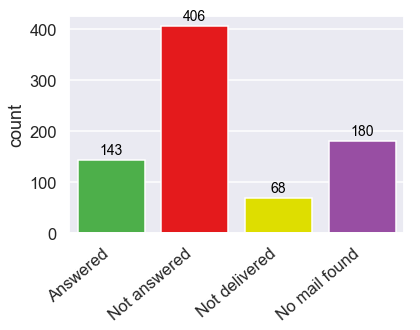

In [17]:
ax = sns.countplot(x='status', data=builds2, order=status_order,
                   palette=['#4daf4a', '#e41a1c', '#dede00', '#984ea3'], saturation=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('')
process_fig(ax, 'answers-received-builds', True, '')

In [18]:
grouped = builds2.groupby(['email','status']).size().reset_index()
# grouped = builds2[~builds2['status'].isin(['No mail found'])].groupby(['email','status']).size().reset_index()
# grouped = builds2.groupby(['email','status','repository_name']).size().reset_index()
grouped.rename(columns={0:'Logs per email'}, inplace=True)
grouped_filtered = grouped[~grouped['status'].isin(['No mail found', 'Not delivered'])]
grouped_filtered

,email,status,Logs per email
1,12194950+prertik@users.noreply.github.com,Not answered,10
9,428rinsuki+contact.github@gmail.com,Not answered,1
20,A01113373@itesm.mx,Not answered,2
21,Bram@vim.org,Not answered,3
22,EvgenyKlimov@eaton.com,Answered,1
...,...,...,...
252,xomachiner@gmail.com,Answered,2
253,xramtsov@gmail.com,Not answered,4
254,yan@yanchick.org,Answered,1
255,yangguang760@gmail.com,Not answered,1


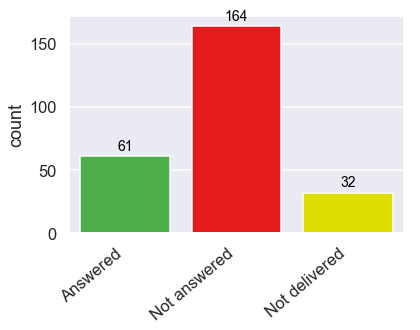

In [19]:
ax = sns.countplot(x='status', data=grouped, order=['Answered', 'Not answered', 'Not delivered'],
                   palette=['#4daf4a', '#e41a1c', '#dede00', '#984ea3'], saturation=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('')
process_fig(ax, 'answers-received-mails', True, '')

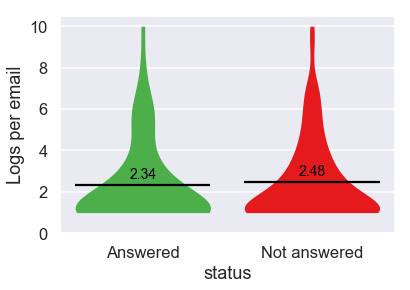

In [20]:
ax = sns.barplot(x='status', y='Logs per email', data=grouped,
                 fill=False, linewidth=0, ci=None, order=['Answered', 'Not answered'])
sns.violinplot(x='status', y='Logs per email', data=grouped, order=['Answered', 'Not answered'],
               palette=['#4daf4a', '#e41a1c'], ci=None, saturation=1,
               inner=None, scale_hue=True,
               cut=0, scale='width',
               linewidth=0, split=False)
process_fig(ax, 'logs-per-mail', False, '')

In [21]:
144 / 797

0.1806775407779172

In [22]:
132 / 144

0.9166666666666666